# HW : 4- Coding Part
Juan Vila



## Part 4

## 4a

In [130]:
#Importing functions
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D

iris=load_iris()
X = iris['data']
y = iris['target']


def normalize(x):
    rv =  x/np.sqrt(np.dot(x.T,x))
    return rv

def find_zero(x):
    idx = np.argwhere(np.all(x[..., :] == 0, axis=0))
    rv = np.delete(x, idx, axis=1)
    return rv
    
    
def projection(U,X):
    p1 = np.dot(U.T,X)
    rv = np.dot(U,p1)
    return rv

def gs_algorithm(A):
    a_nonzero = find_zero(A)
    U = normalize(a_nonzero[:,0])
    A_j=a_nonzero[:,1:]
    n = np.shape(A_j)[1]
    for i in range(n):
        x_j= A_j[:,i]
        x_j_prime = x_j - projection(U,x_j)
        if x_j_prime.sum() == 0:
            continue
        U = np.c_[ U, normalize(x_j_prime)]
        
    return U


def beta_est(Y,x,cons=True):
    if cons:
        X = np.column_stack((x,np.ones([len(x),1])))
    else:
        X=x.copy()
    return np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))

def proyection_2(Y,x, cons=True):
    if cons:
        X = np.column_stack((x,np.ones([len(x),1])))
    else:
        X=x.copy()
    y_hat = np.dot(X,beta_est(Y,x,cons))
    return y_hat

def normalization(X):
    rv = X.copy()
    for i in range(np.shape(X)[1]):
        mean = X[:,i].mean()
        sd = X[:,i].std()
        rv[:,i] = (X[:,i] - mean)/sd
    return rv
        

def cross_val(y,X,n_train, n_test, n):
    '''
    n_train: Size train set
    n_test: Size test set
    n: number of repetitions
    '''
    
    data = np.column_stack((y,X))
    
    #data_cv = np.split(data,n)
    rv =[]
    
    for i in range(n):
        np.random.shuffle(data)
        test_set  = np.array(random.sample(data.tolist(),n_test))
        train_set = np.array(random.sample(data.tolist(),n_train))
        y_test_orig, x_test_orig =  test_set[:,[0]], test_set[:,1:]
        y_train_orig, x_train_orig = train_set[:,[0]], train_set[:,1:]
        unique_train, counts_train = np.unique(y_test_orig, return_counts=True)
        unique_test, counts_test = np.unique(y_train_orig, return_counts=True)
        
        if len(unique_train) != 3 or len(unique_test) != 3:
            while len(unique_train) != 3 or len(unique_test) != 3:
                np.random.shuffle(data)
                test_set  = np.array(random.sample(data.tolist(),n_test))
                train_set = np.array(random.sample(data.tolist(),n_train))
                y_test_orig, x_test_orig =  test_set[:,[0]], test_set[:,1:]
                y_train_orig, x_train_orig = train_set[:,[0]], train_set[:,1:]
                unique_train, counts_train = np.unique(y_test_orig, return_counts=True)
                unique_test, counts_test = np.unique(y_train_orig, return_counts=True)
               
        count = 0    
        for i in range(3):
            y_train = np.where(y_train_orig == i, 1, 0)
            y_test = np.where(y_test_orig == i, 1, 0)
            w = beta_est(y_train, x_train_orig)
            x_test = np.column_stack((x_test_orig,np.ones([len(x_test_orig),1])))
            y_hat = np.dot(x_test,w)        
            y_label_assig = np.where(y_hat>.5,1,0)
            for i,j in enumerate(y_test):
                if y_label_assig[i] != y_test[i]:
                    count+=1
        
        rv.append(count/(3 * n_test))
    rv=np.array(rv)
    
    return rv.mean()

***Graphing Features in 3d space***

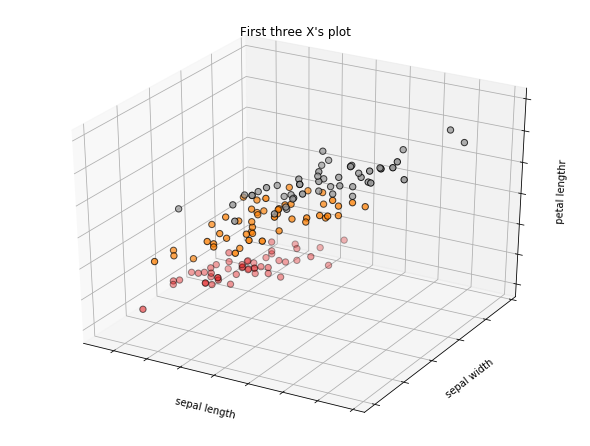

In [53]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three X's plot")
ax.set_xlabel("sepal length")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("sepal width")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("petal lengthr")
ax.w_zaxis.set_ticklabels([])




plt.show()

For computing a 3d space we need to select three points. For selecting this points we are going to select the mean of the three features that we use in part d of hw3 for each category as representative points

In [109]:
data = np.column_stack((y,X))
rv =[]
#representative points
for i in range(3):
    rv_i=[]
    type_d=np.where(data[:,0]==i)
    type_d=data[type_d]
    for j in range(1,4,1):
        rv_i.append(type_d[:,j].mean())
    rv.append(rv_i) 
rv=np.array(rv)

In [133]:
u1= np.add(rv[:,0],-rv[:,2])
u2= np.add(rv[:,1],-rv[:,2])
U=np.column_stack((u1,u2))
U_orhoN=gs_algorithm(U)

In [153]:
X_transform_approach1 = X[:,(0,1,2)].dot(U_orhoN)

Another alternative is use the two first column of the matrix V of the SVD.

In [152]:
svd = np.linalg.svd(X[:,(0,1,2)])
VT = svd[2]
VT.T[:,(0,1)]
X_transform_approach2 = X[:,(0,1,2)].dot(VT.T[:,(0,1)])

## 4b

In [216]:
random.seed(1234)

In [225]:

import random
x_norm_t1 = normalization(X_transform_approach1)
cross_val(y,X_transform_approach2,40,10,1000)

0.15266666666666667

In [226]:
x_norm_t2 = normalization(X_transform_approach2)
cross_val(y,X_transform_approach2,40,10,1000)

0.15070000000000003

In [228]:
x_norm = normalization(X)
x_d = x_norm[:,[0,1,2]]
random.seed(1234)
cross_val(y,x_d,40,10,1000)

0.13626666666666667

***Comment:*** We see that approach one and two have a higher mean error, but with little difference between each other but nearly 1.5% and 1.7% more error that the full dimension X.